In [1]:
import pandas as pd

# List of response and time file paths
response_files = ['responseFile_1.csv', 'responseFile_3.csv', 'responseFile_4.csv', 'responseFile_5.csv', 'responseFile_6.csv', 'responseFile_7.csv']
time_files = ['timeFile_1.csv', 'timeFile_3.csv', 'timeFile_4.csv', 'timeFile_5.csv', 'timeFile_6.csv', 'timeFile_7.csv']

# Initialize DataFrames to hold the merged data
merged_response = pd.DataFrame()
merged_time = pd.DataFrame()
end_time = 0  # Initialize the end time

# Iterate through response and time files
for response_file, time_file in zip(response_files, time_files):
    # Load response and time DataFrames
    response_df = pd.read_csv(response_file)
    time_df = pd.read_csv(time_file)
    # for angles, center them at 180
    # (180 + pitch) % 360
    response_df[' Pitch'] =  round(((response_df[' Pitch'] + 180) % 360 ), 2)
    response_df[' Roll'] = round(((response_df[' Roll'] + 180) % 360),2) 
    time_df['Pitch'] = round(((time_df[' Pitch'] + 180) % 360 ),2)
    time_df[' Roll'] = round(((time_df[' Roll'] + 180) % 360),2) 



    # Shift time values in time_df
    time_df['Elapsed Time (ms)'] += end_time

    # Update the start time for response_df
    response_df['Elapsed Time (ms)'] += end_time

    # Concatenate response and time DataFrames
    merged_response = pd.concat([merged_response, response_df], ignore_index=True)
    merged_time = pd.concat([merged_time, time_df], ignore_index=True)

    # Update the end time
    end_time = time_df['Elapsed Time (ms)'].max()

# Save merged response and time DataFrames to new CSV files
merged_response.to_csv('merged_response.csv', index=False)
merged_time.to_csv('merged_time.csv', index=False)


In [9]:
import pandas as pd

# List of response and time file paths
response_files = ['responseFile_1.csv', 'responseFile_2.csv', 'responseFile_3.csv', 'responseFile_4.csv', 'responseFile_5.csv', 'responseFile_6.csv', 'responseFile_7.csv']
time_files = ['timeFile_1.csv', 'timeFile_2.csv', 'timeFile_3.csv', 'timeFile_4.csv', 'timeFile_5.csv', 'timeFile_6.csv', 'timeFile_7.csv']

# Initialize DataFrames to hold the merged data
merged_response = pd.DataFrame()
merged_time = pd.DataFrame()
end_time = 0  # Initialize the end time

# Iterate through response and time files
for response_file, time_file in zip(response_files, time_files):
    # Load response and time DataFrames
    response_df = pd.read_csv(response_file)
    time_df = pd.read_csv(time_file)

    # for angles, center them at 180
    response_df[' Pitch'] = round(((response_df[' Pitch'] + 180) % 360), 2)
    response_df[' Roll'] = round(((response_df[' Roll'] + 180) % 360), 2)

    # Update time_df and remove old ' Pitch' and ' Roll' columns
    time_df['Pitch'] = round(((time_df[' Pitch'] + 180) % 360), 2)
    time_df['Roll'] = round(((time_df[' Roll'] + 180) % 360), 2)
    time_df.drop(columns=[' Pitch', ' Roll'], inplace=True)  # Drop the original columns

    # Shift time values in time_df
    time_df['Elapsed Time (ms)'] += end_time

    # Update the start time for response_df
    response_df['Elapsed Time (ms)'] += end_time

    # Concatenate response and time DataFrames
    merged_response = pd.concat([merged_response, response_df], ignore_index=True)
    merged_time = pd.concat([merged_time, time_df], ignore_index=True)

    # Update the end time
    end_time = time_df['Elapsed Time (ms)'].max()

# Save merged response and time DataFrames to new CSV files using float_format to ensure 2 decimal places
merged_response.to_csv('merged_response.csv', index=False, float_format='%.2f')
merged_time.to_csv('merged_time.csv', index=False, float_format='%.2f')


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import mode

# Read the response_csv and time_csv into DataFrames
# response_df = pd.read_csv('merged_response.csv')
# time_df = pd.read_csv('data/timeFile_20230904_1513.csv')
# Read the response_csv and time_csv into DataFrames
response_df = pd.read_csv('merged_response.csv')
time_df = pd.read_csv('merged_time.csv')

# Remove spaces from column names in response_df
response_df.columns = response_df.columns.str.strip()

# Remove spaces from column names in time_df
time_df.columns = time_df.columns.str.strip()
# Remove spaces from column values in response_df
response_df = response_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remove spaces from column values in time_df
time_df = time_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Specify the time_window in milliseconds
time_window = 5000  # Adjust this value as needed

# Function to calculate statistics within the time_window
def calculate_statistics(row):
    start_time = row['Elapsed Time (ms)'] - time_window
    relevant_data = time_df[(time_df['Elapsed Time (ms)'] >= start_time) & (time_df['Elapsed Time (ms)'] <= row['Elapsed Time (ms)'])]
    pitch_values = relevant_data['Pitch'].round().astype(int)
    yaw_values = relevant_data['Yaw'].round().astype(int)
    roll_values = relevant_data['Roll'].round().astype(int)

    std_pitch = pitch_values.std()
    var_pitch = pitch_values.var()
    mean_pitch = pitch_values.mean()
    mode_pitch = mode(pitch_values, axis=None)[0]
    median_pitch = pitch_values.median()

    std_yaw = yaw_values.std()
    var_yaw = yaw_values.var()
    mean_yaw = yaw_values.mean()
    mode_yaw = mode(yaw_values, axis=None)[0]
    median_yaw = yaw_values.median()

    std_roll = roll_values.std()
    var_roll = roll_values.var()
    mean_roll = roll_values.mean()
    mode_roll = mode(roll_values, axis=None)[0]
    median_roll = roll_values.median()

    return pd.Series({
        'std_pitch': round(std_pitch, 2),
        'var_pitch': round(var_pitch, 2),
        'mean_pitch': round(mean_pitch, 2),
        'mode_pitch': round(mode_pitch,2),   # Assuming this will always be a whole number
        'median_pitch': round(median_pitch, 2),
        'std_yaw': round(std_yaw, 2),
        'var_yaw': round(var_yaw, 2),
        'mean_yaw': round(mean_yaw, 2),
        'mode_yaw': round(mode_yaw,2),       # Assuming this will always be a whole number
        'median_yaw': round(median_yaw, 2),
        'std_roll': round(std_roll, 2),
        'var_roll': round(var_roll, 2),
        'mean_roll': round(mean_roll, 2),
        'mode_roll': round(mode_roll,2),     # Assuming this will always be a whole number
        'median_roll': round(median_roll, 2)
    })

# Convert 'Pitch', 'Yaw', and 'Roll' to integers in response_df and time_df
response_df['Pitch'] = response_df['Pitch'].round().astype(int)
response_df['Yaw'] = response_df['Yaw'].round().astype(int)
response_df['Roll'] = response_df['Roll'].round().astype(int)

time_df['Pitch'] = time_df['Pitch'].round().astype(int)
time_df['Yaw'] = time_df['Yaw'].round().astype(int)
time_df['Roll'] = time_df['Roll'].round().astype(int)

# Apply the function to each row in the response DataFrame
statistics_df = response_df.apply(calculate_statistics, axis=1)

# Concatenate the statistics DataFrame with the response DataFrame
merged_df = pd.concat([response_df, statistics_df], axis=1)

# Create the 'attentive' column
merged_df['Attentive'] = response_df['Correct'].apply(lambda x: 0 if x == 'No' else 1)

# Save the final DataFrame to a new CSV file
merged_df.to_csv('responseFile_with_statistics.csv', index=False, float_format='%.2f')



C:\Users\muham\AppData\Local\Temp\ipykernel_13184\267367656.py:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_pitch = mode(pitch_values, axis=None)[0]
C:\Users\muham\AppData\Local\Temp\ipykernel_13184\267367656.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this war

TypeError: type numpy.ndarray doesn't define __round__ method

# HeatMap

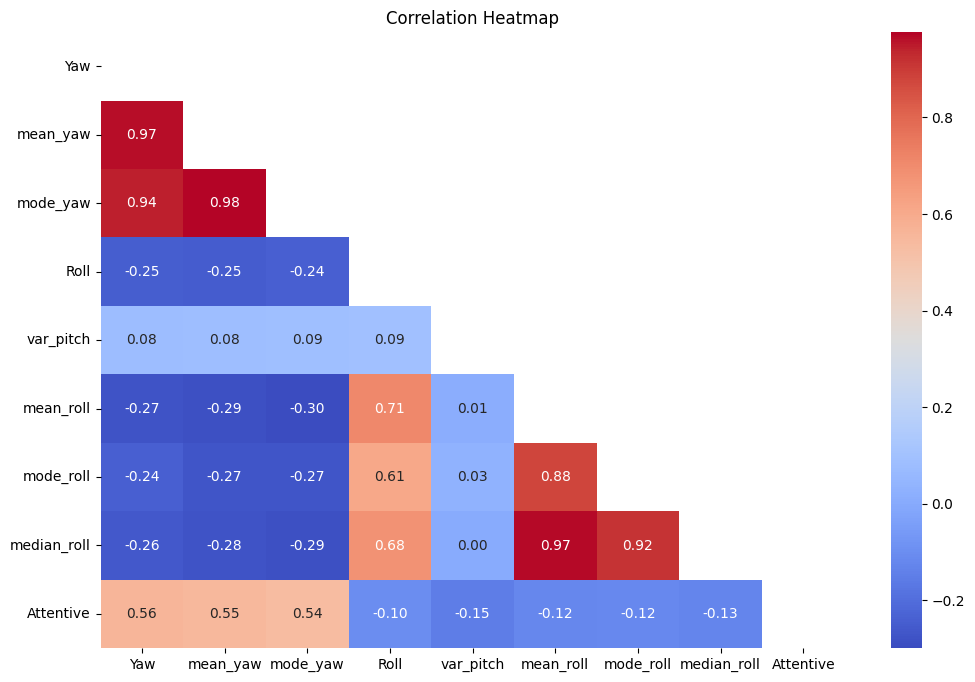

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the DataFrame
merged_df = pd.read_csv('modified_responseFile_with_statistics.csv')

# Filter out only the columns of interest
selected_columns = merged_df.select_dtypes(include=['int64', 'float64'])
# Compute the correlation matrix for these columns
selected_columns = merged_df[['Yaw', 'mean_yaw', 'mode_yaw', 'Roll', 'var_pitch', 'mean_roll','mode_roll', 'median_roll' , 'Attentive']]
            
correlation_matrix_selected = selected_columns.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_selected, dtype=bool))

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


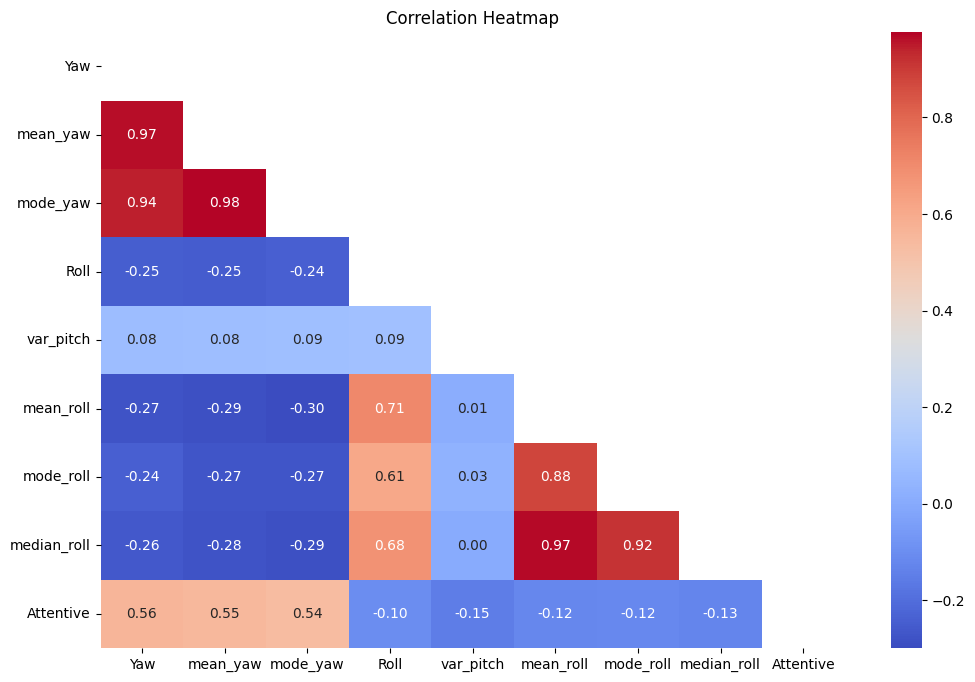

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the DataFrame
merged_df = pd.read_csv('modified_responseFile_with_statistics.csv')

# Filter out only the columns of interest
selected_columns = merged_df.select_dtypes(include=['int64', 'float64'])
# Compute the correlation matrix for these columns
selected_columns = merged_df[['Yaw', 'mean_yaw', 'mode_yaw', 'Roll', 'var_pitch', 'mean_roll','mode_roll', 'median_roll' , 'Attentive']]
            
correlation_matrix_selected = selected_columns.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_selected, dtype=bool))

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


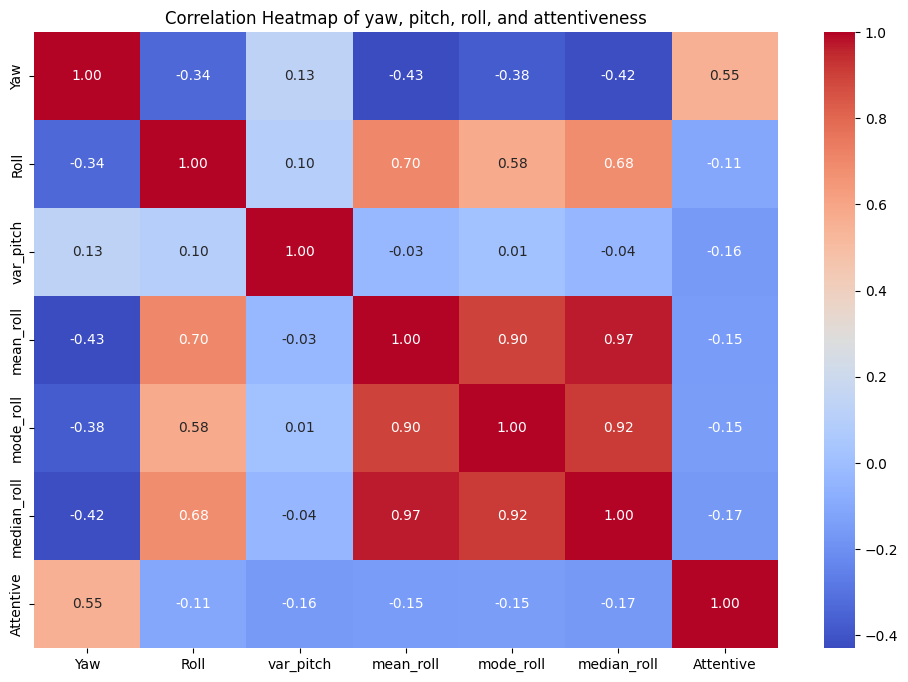

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the DataFrame
merged_df = pd.read_csv('modified_responseFile_with_statistics.csv')

# Filter out only the columns of interest: yaw, pitch, roll, and attentiveness
selected_columns = merged_df[['Yaw', 'Roll', 'var_pitch', 'mean_roll','mode_roll', 'median_roll' , 'Attentive']]

# Compute the correlation matrix for these columns
correlation_matrix_selected = selected_columns.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of yaw, pitch, roll, and attentiveness')
plt.show()


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the DataFrame
merged_df = pd.read_csv('modified_responseFile_with_statistics.csv')

# Filter out only the columns of interest
selected_columns = merged_df[['Yaw', 'Roll', 'var_pitch', 'mean_roll','mode_roll', 'median_roll', 'mean_yaw', 'mode' , 'Attentive']]

# Compute the correlation matrix for these columns
correlation_matrix_selected = selected_columns.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_selected, dtype=bool))

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of yaw, pitch, roll, and attentiveness')
plt.show()


KeyError: "['mode'] not in index"

# Reduce number of positive classes

In [3]:
import pandas as pd

# Read the CSV into a DataFrame
df = pd.read_csv('responseFile_with_statistics.csv')

# Filter rows where Attentive = 1 and shuffle
attentive_rows = df[df['Attentive'] == 1].sample(frac=1, random_state=42)

# Filter rows where Attentive != 1
non_attentive_rows = df[df['Attentive'] != 1]

# Concatenate the DataFrames
final_df = pd.concat([attentive_rows, non_attentive_rows], axis=0).sort_index()

# Save the final DataFrame to a new CSV file
final_df.to_csv('modified_responseFile_with_statistics.csv', index=False)

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Epoch 1/50
7/7 - 1s - loss: 0.6457 - accuracy: 0.7415 - val_loss: 0.6266 - val_accuracy: 0.7692 - 1s/epoch - 210ms/step
Epoch 2/50
7/7 - 0s - loss: 0.6486 - accuracy: 0.7463 - val_loss: 0.6034 - val_accuracy: 0.7692 - 72ms/epoch - 10ms/step
Epoch 3/50
7/7 - 0s - loss: 0.5886 - accuracy: 0.7707 - val_loss: 0.5883 - val_accuracy: 0.7885 - 70ms/epoch - 10ms/step
Epoch 4/50
7/7 - 0s - loss: 0.5705 - accuracy: 0.7659 - val_loss: 0.5700 - val_accuracy: 0.7692 - 73ms/epoch - 10ms/step
Epoch 5/50
7/7 - 0s - loss: 0.5481 - accuracy: 0.7805 - val_loss: 0.5619 - val_accuracy: 0.7500 - 71ms/epoch - 10ms/step
Epoch 6/50
7/7 - 0s - loss: 0.5390 - accuracy: 0.7902 - val_loss: 0.5484 - val_accuracy: 0.7692 - 73ms/epoch - 10ms/step
Epoch 7/50
7/7 - 0s - loss: 0.5288 - accuracy: 0.8049 - val_loss: 0.5426 - val_accuracy: 0.7692 - 72ms/epoch - 10ms/step
Epoch 8/50
7/7 - 0s - loss: 0.5127 - accuracy: 0.7902 - val_loss: 0.5422 - val_accuracy: 0.7692 - 68ms/epoch - 10ms/step
Epoch 9/50
7/7 - 0s - loss: 0.508

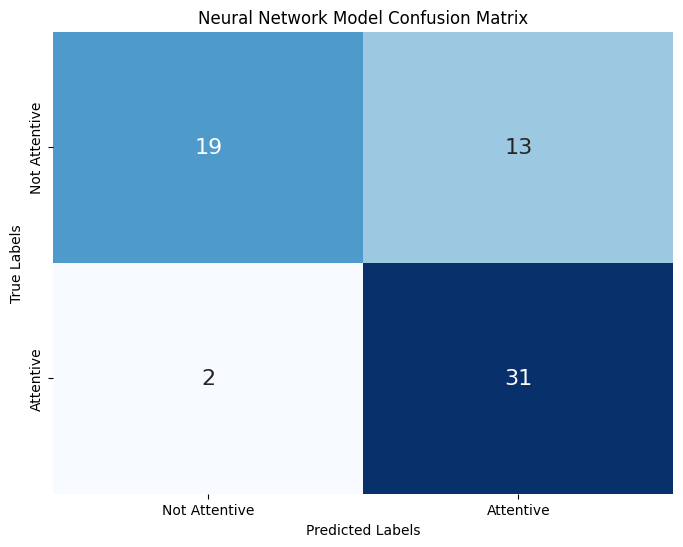

In [58]:


# Read your preprocessed DataFrame (responseFile_with_statistics.csv)
df = pd.read_csv('modified_responseFile_with_statistics.csv')

# Select the features and the target variable
features = df[['Yaw', 'std_yaw', 'mean_yaw', 'mode_yaw', 'median_yaw']]
target = df['Attentive']

# Select only the rows where the target variable is 0 or 1
target = target[target.isin([0, 1])]

# Count the number of positive and negative labels
positive_count = (target == 1).sum()
negative_count = (target == 0).sum()

# Select an equal number of positive and negative labels
min_count = min(positive_count, negative_count)
positive_samples = target[target == 1].sample(n=min_count, random_state=42)
negative_samples = target[target == 0].sample(n=min_count, random_state=42)

# Combine the selected samples
selected_samples = pd.concat([positive_samples, negative_samples])

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(features.loc[selected_samples.index], selected_samples, test_size=0.2, random_state=42)

# Create a neural network model
model = keras.Sequential([
    layers.Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
confusion_nn = confusion_matrix(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)

print(f'Neural Network Model Accuracy: {accuracy_nn}')
print('Neural Network Model Confusion Matrix:')
print(confusion_nn)
print('Neural Network Model Classification Report:')
print(report_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nn, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Neural Network Model Confusion Matrix')
plt.show()


Baseline Accuracy: 0.9292929292929293
Baseline Confusion Matrix:
[[  2   9]
 [  5 182]]
Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.18      0.22        11
           1       0.95      0.97      0.96       187

    accuracy                           0.93       198
   macro avg       0.62      0.58      0.59       198
weighted avg       0.92      0.93      0.92       198



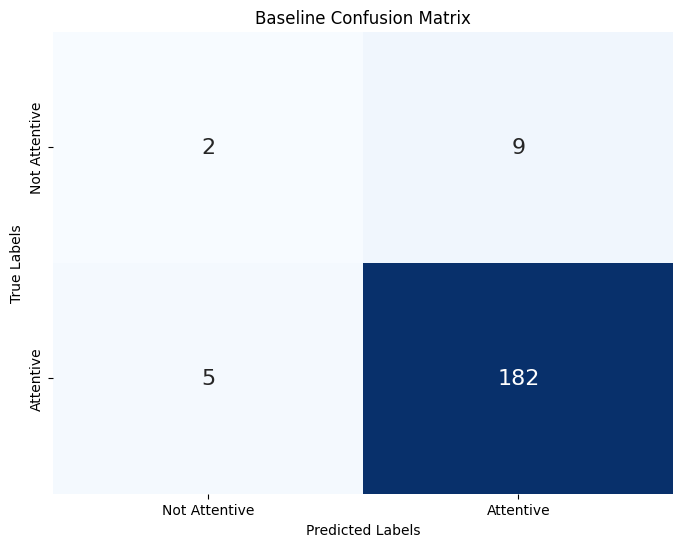

In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read your preprocessed DataFrame (responseFile_with_statistics.csv)
df = pd.read_csv('modified_responseFile_with_statistics.csv')

# Select the features and the target variable
features = df[['Yaw', 'std_yaw', 'mean_yaw', 'mode_yaw', 'median_yaw']]
target = df['Attentive']

# Select only the rows where the target variable is 0 or 1
target = target[target.isin([0, 1])]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Baseline model: Predict 1 if Yaw is between 150 and 200, else predict 0
y_pred_baseline = (X_test['Yaw'] >= 150) & (X_test['Yaw'] <= 200)
y_pred_baseline = y_pred_baseline.astype(int)  # Convert boolean values to integers

# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
confusion_baseline = confusion_matrix(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)

print(f'Baseline Accuracy: {accuracy_baseline}')
print('Baseline Confusion Matrix:')
print(confusion_baseline)
print('Baseline Classification Report:')
print(report_baseline)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_baseline, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Baseline Confusion Matrix')
plt.show()


# SVM

Accuracy: 0.9393939393939394
Confusion Matrix:
[[  1  10]
 [  2 185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.95      0.99      0.97       187

    accuracy                           0.94       198
   macro avg       0.64      0.54      0.56       198
weighted avg       0.91      0.94      0.92       198



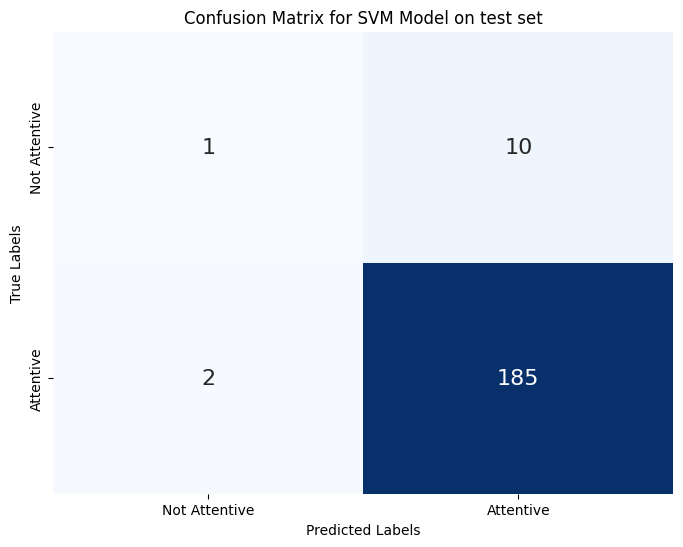

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read your preprocessed DataFrame (responseFile_with_statistics.csv)
df = pd.read_csv('modified_responseFile_with_statistics.csv')

# Select the features and the target variable

# features = df[['Yaw', 'std_yaw', 'mean_yaw', 'mode_yaw', 'median_yaw']]
features = df[[
    'Yaw',
    'Pitch',
    'Roll',
    'std_pitch',
        'var_pitch',
        # 'mean_pitch',
        # 'mode_pitch',
        # 'median_pitch',
        'std_yaw',
        # 'var_yaw',
        'mean_yaw',
        'mode_yaw',
        # 'median_yaw',
        'std_roll',
        # 'var_roll',
        # 'mean_roll',
        # 'mode_roll',
        'median_roll']]

target = df['Attentive']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Support Vector Machine (SVM) model
svm = SVC(kernel='linear')  # You can choose different kernels (linear, radial basis function, etc.)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model on test set') 
plt.show()


Accuracy: 0.9126582278481012
Confusion Matrix:
[[  5  68]
 [  1 716]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.07      0.13        73
           1       0.91      1.00      0.95       717

    accuracy                           0.91       790
   macro avg       0.87      0.53      0.54       790
weighted avg       0.91      0.91      0.88       790



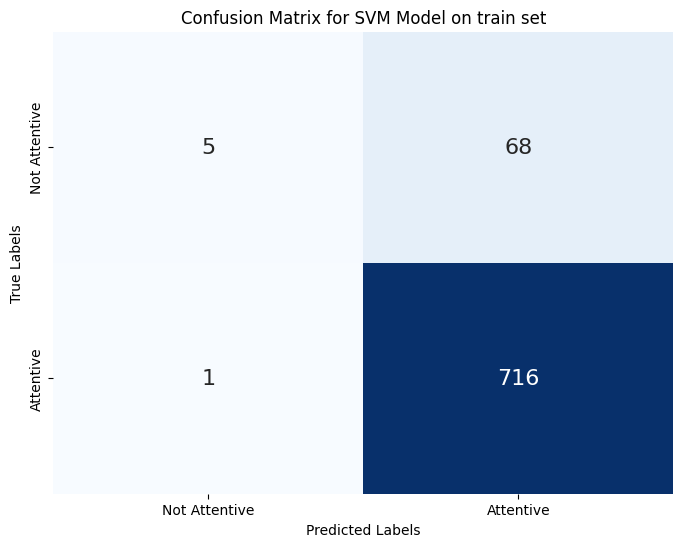

In [37]:
# Make predictions on the test set
y_pred = svm.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
confusion = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model on train set')
plt.show()


# Random Forest

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import random

# Read your preprocessed DataFrame (responseFile_with_statistics.csv)
df = pd.read_csv('responseFile_with_statistics.csv')

# Define the features and the target variable
X = df[['Yaw', 'std_yaw', 'mean_yaw', 'mode_yaw', 'median_yaw', 'std_pitch', 'var_pitch', 'std_yaw', 'var_yaw', 'mean_yaw', 'mode_yaw', 'median_yaw', 'median_roll']]
y = df['Attentive']

# Always used yaw-related features
yaw_features = ['Yaw', 'std_yaw', 'mean_yaw', 'mode_yaw', 'median_yaw']

# Remaining features from which we will randomly select
remaining_features = [feature for feature in X.columns if feature not in yaw_features]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# Create a Random Forest model
rf_classifier = RandomForestClassifier()

# Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

best_accuracy = 0.0
best_feature_combination = None

# Number of iterations for random feature selection
num_iterations = 3

for _ in range(num_iterations):
    # Randomly select 3 features from the remaining set
    random_features = random.sample(remaining_features, 3)

    # Combine yaw features and randomly selected features
    selected_features = yaw_features + random_features

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    grid_search = GridSearchCV(
        estimator=rf_classifier,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=2,
        n_jobs=-1,
    )

    grid_search.fit(X_train_selected, y_train)
    accuracy = grid_search.best_score_

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature_combination = selected_features

best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
X_test_best = X_test[list(best_feature_combination)]
y_pred = best_model.predict(X_test_best)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Feature Combination: {best_feature_combination}')
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy of Best Model: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Read your preproces
# sed DataFrame (responseFile_with_statistics.csv)
df = pd.read_csv('responseFile_with_statistics.csv')

# Select the features and the target variable
# features = df[['Yaw', 'std_yaw', 'mean_yaw', 'mode_yaw', 'median_yaw']]
# You can include more features if needed, as you commented out in your original code
features = df[[
    'Yaw',
    'Pitch',
    'Roll',
    'std_pitch',
    'var_pitch',
    # 'mean_pitch',
    # 'mode_pitch',
    'median_pitch',
    # 'std_yaw',
    'var_yaw',
    # 'mean_yaw',
    # 'mode_yaw',
    'median_yaw',
    # 'std_roll',
    'var_roll',
    # 'mean_roll',
    'mode_roll',
    'median_roll'
        ]]
y = df['Attentive']

sc = StandardScaler()
features_scaled = sc.fit_transform(features)

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
class_weights = {0: 5, 1: 1} 
rf_classifier = RandomForestClassifier(random_state=42,max_depth=10, class_weight=class_weights, n_estimators=10)  # You can adjust the number of estimators as needed
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 5, 1: 1}, max_depth=10, n_estimators=10,
                       random_state=42)

Accuracy: 0.9886075949367089
Confusion Matrix:
[[ 59   8]
 [  1 722]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        67
           1       0.99      1.00      0.99       723

    accuracy                           0.99       790
   macro avg       0.99      0.94      0.96       790
weighted avg       0.99      0.99      0.99       790



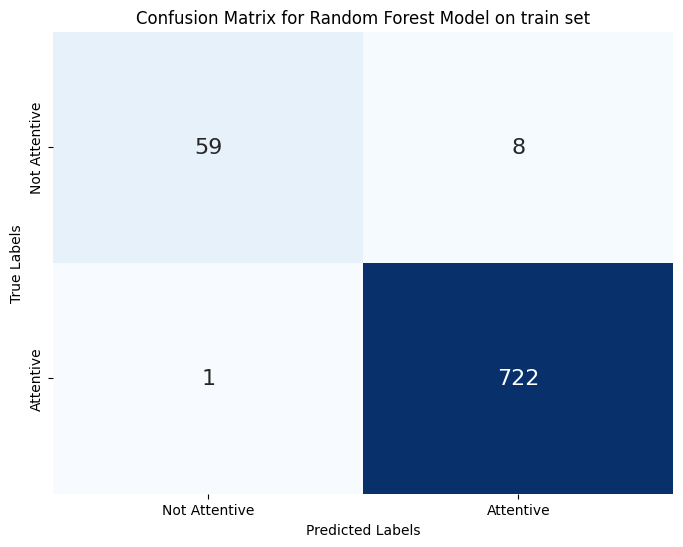

In [39]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
confusion = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model on train set')
plt.show()

Accuracy: 0.898989898989899
Confusion Matrix:
[[  1  16]
 [  4 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.06      0.09        17
           1       0.92      0.98      0.95       181

    accuracy                           0.90       198
   macro avg       0.56      0.52      0.52       198
weighted avg       0.86      0.90      0.87       198



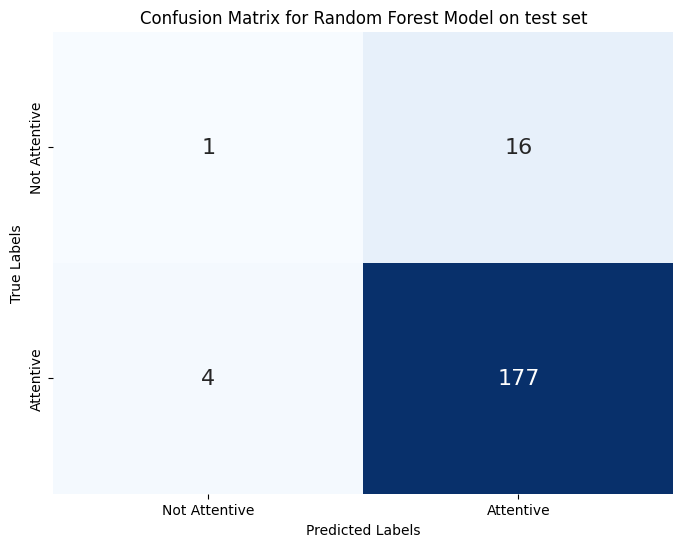

In [40]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model on test set')
plt.show()

In [144]:
df[df['Attentive'] == 0]

,Elapsed Time (ms),Response Time (ms),Alphabet,Correct,Error Type,Pitch,Yaw,Roll,std_pitch,var_pitch,...,var_yaw,mean_yaw,mode_yaw,median_yaw,std_roll,var_roll,mean_roll,mode_roll,median_roll,Attentive
13,28071,2000,b,No,Omission,178,192,172,8.43,71.01,...,32.12,184.49,191.0,185.0,1.48,2.18,175.10,176.0,176.0,0
28,56826,598,X,No,Commission,176,185,171,0.52,0.27,...,11.90,187.08,185.0,185.0,0.43,0.18,171.76,172.0,172.0,0
29,60249,2000,W,No,Omission,169,253,168,3.60,12.95,...,1047.51,211.53,185.0,188.0,3.05,9.29,169.48,171.0,171.0,0
37,76305,2000,E,No,Omission,170,187,173,5.57,31.01,...,1083.93,233.16,262.0,237.0,2.81,7.90,172.70,171.0,173.0,0
38,76556,250,x,No,Commission,173,183,174,5.64,31.79,...,1071.83,233.28,262.0,237.0,2.66,7.09,172.55,171.0,173.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1841219,333,x,No,Commission,178,174,172,0.45,0.20,...,1.19,174.56,174.0,174.0,0.16,0.03,171.97,172.0,172.0,0
919,1843230,327,X,No,Commission,178,172,172,0.48,0.23,...,0.76,173.61,174.0,174.0,0.33,0.11,171.87,172.0,172.0,0
936,1877408,361,x,No,Commission,183,180,172,0.00,0.00,...,0.25,179.55,180.0,180.0,0.48,0.23,172.36,172.0,172.0,0
975,1956136,722,X,No,Commission,177,182,174,0.29,0.08,...,0.92,182.54,182.0,183.0,0.82,0.68,174.12,174.0,174.0,0


In [405]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
# Load the data
df = pd.read_csv('modified_responseFile_with_statistics.csv')

df_false = df[df['Attentive'] == 0]
df_true = df[df['Attentive'] == 1].sample(n=len(df_false), random_state=42)

# Concatenate the DataFrames
df = pd.concat([df_true, df_false], axis=0).sort_index()

# Normalize the input features
scaler = StandardScaler()
features = df[['Yaw', 'std_yaw', 'mean_yaw', 'mode_yaw', 'median_yaw', 'std_pitch', 'var_pitch', 'std_yaw', 'var_yaw', 'mean_yaw', 'mode_yaw', 'median_yaw', 'median_roll']]
# features = df[[
#     'Yaw',
#     'Pitch',
#     'Roll',
#     'std_pitch',
#         'var_pitch',
#         'mean_pitch',
#         'mode_pitch',
#         'median_pitch',
#         'std_yaw',
#         'var_yaw',
#         'mean_yaw',
#         'mode_yaw',
#         'median_yaw',
#         'std_roll',
#         'var_roll',
#         'mean_roll',
#         'mode_roll',
#         'median_roll'
#         ]]
features_normalized = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_normalized, df['Attentive'], test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(features.shape[1],)),
    Dropout(0.85),
    # Dense(1024, activation='relu'),
    # Dropout(0.5),
    # Dense(1024, activation='relu'),
    # Dropout(0.5),
    # Dense(512, activation='relu'),
    # Dropout(0.5),
    # Dense(512, activation='relu'),
    # Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.75),
    Dense(8, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

# Compile the model
lr = 0.0003
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=['accuracy'])

Epoch 1/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0921 - accuracy: 0.5625

5/5 [==============================] - 0s 29ms/step - loss: 0.0892 - accuracy: 0.6642 - val_loss: 0.1027 - val_accuracy: 0.6471
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 0.1065 - accuracy: 0.6716 - val_loss: 0.1025 - val_accuracy: 0.6471
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1050 - accuracy: 0.5821 - val_loss: 0.1024 - val_accuracy: 0.6471
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0943 - accuracy: 0.6045 - val_loss: 0.1023 - val_accuracy: 0.6765
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1001 - accuracy: 0.6418 - val_loss: 0.1022 - val_accuracy: 0.6765
Epoch 6/100
5/5 [==============================] - 0s 26ms/step - loss: 0.1089 - accuracy: 0.6045 - val_loss: 0.1021 - val_accuracy: 0.6765
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1029 - accuracy: 0.6045 - val_loss: 0.1020 - val_accuracy: 0.6765
Epoch 8/100
5/5 [===============

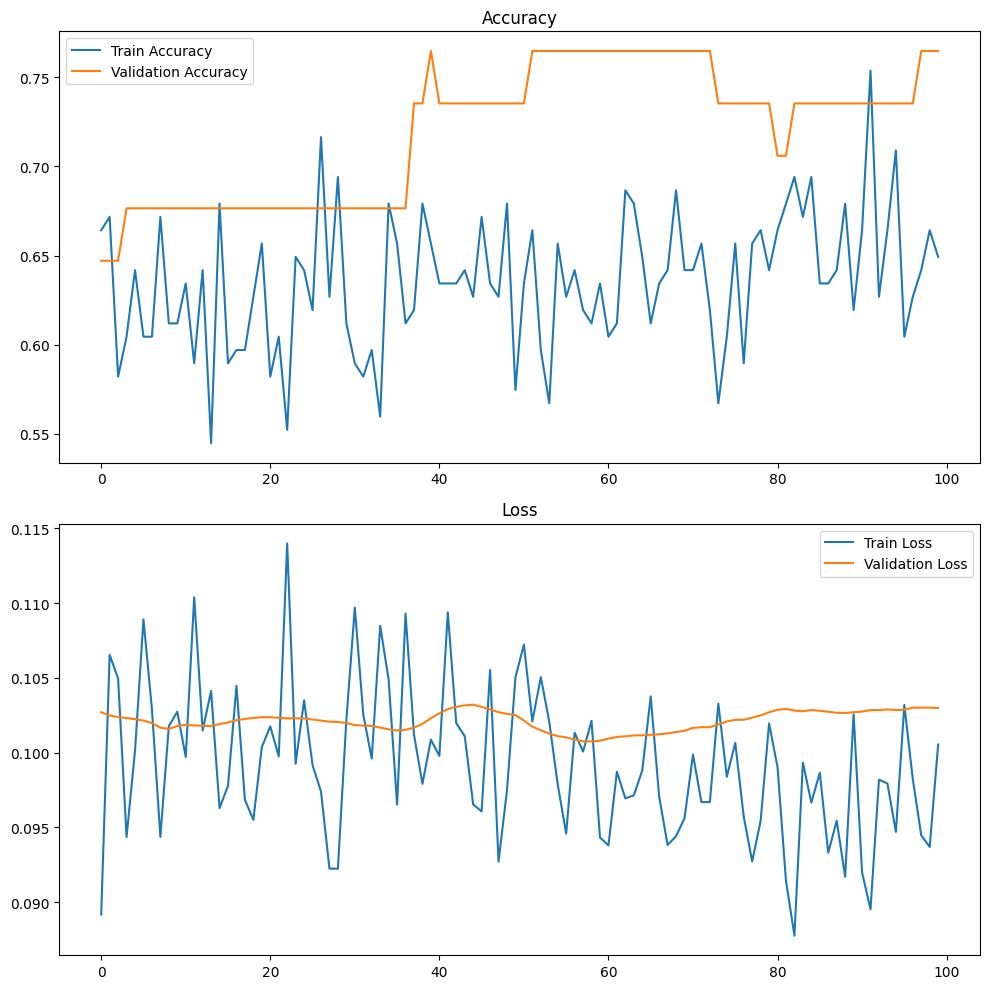

In [411]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))#, class_weight={0: 10, 1: 1})

# Plot accuracy and loss
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].legend()
ax[1].set_title('Loss')

plt.tight_layout()
plt.show()

2/2 [==============================] - 0s 4ms/step


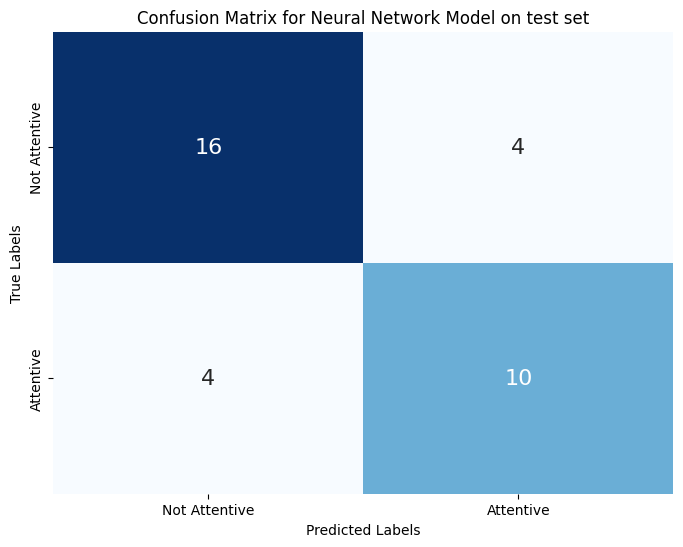

In [412]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import seaborn as sns
y_pred = (model.predict(X_test) > 0.5).astype(int)
# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
 
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network Model on test set')
plt.show()

In [413]:
score = f1_score(y_test, y_pred, average='weighted')
print(score)

0.7647058823529412


5/5 [==============================] - 0s 2ms/step


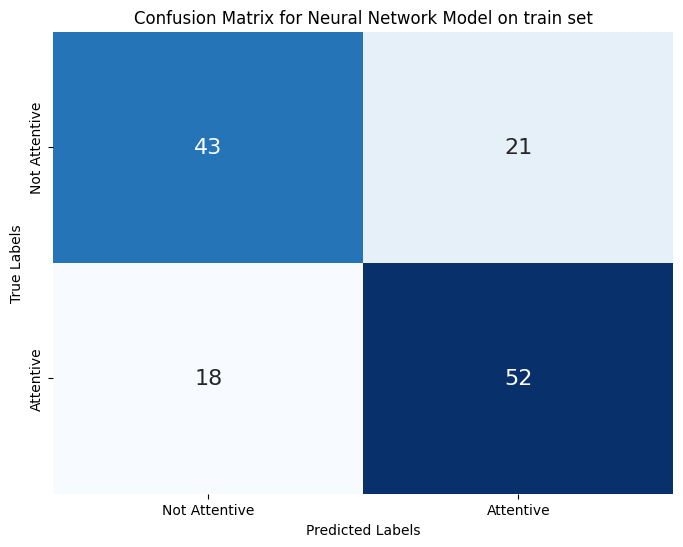

In [414]:
y_pred = (model.predict(X_train) > 0.5).astype(int)
# Generate the confusion matrix
confusion = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network Model on train set')
plt.show()

In [415]:
score = f1_score(y_train, y_pred, average='weighted')
print(score)

0.708515603799186
